<a href="https://colab.research.google.com/github/Psychohistorian11/Fisica_II/blob/master/Clases/Taller_2_Ondas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Solución Númerica de la Ecuación de Onda



---
Estamos trabajando con fenomenos ondulatorios, Las ondas son perturvaciones que se propagan, En el caso de una dimensión la función de onda se puede obtener desde la ecuación de onda, la cual tiene la forma

$$\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{1}{v^2}\frac{\partial^2 u(x,t)}{\partial t^2}\tag{1}$$

Para resolver la ecuación de onda de forma numerica debemos recordar que cualquier función la podemos escribir como una serie de Taylor

$$\phi(x\pm\Delta x) =\sum_{n = 0}^{∞}(\pm 1)^{n}\frac{\phi^{n}(x)\Delta x ^ n}{n!}$$

En general podemos aproximar una segunda derivada desde las series de Taylor como

$$\phi(x + \Delta x) ≈ \phi(x) + \phi^{1}(x)\Delta x + \frac{1}{2}\phi^2(x)\Delta x^2 +O(\Delta x^3)$$

$$\phi(x - \Delta x) ≈ \phi(x) - \phi^{1}(x)\Delta x + \frac{1}{2}\phi^2(x)\Delta x^2
 - O(\Delta x^3)$$

 Ahora sumamos ambas expresiones

 $$\phi(x + \Delta x) + \phi(x-\Delta x) ≈ 2\phi(x) +  \phi^{2}(x) \Delta x^2$$

 Ahora despejamos la segunda derivada

 $$\phi^{2}≈ \frac{\phi(x + \Delta x) + \phi(x-\Delta x) - 2\phi(x)}{\Delta x^2}$$

 Teniendo en cuenta lo anterior apliquemos esto a la ecuación de onda

 en este caso tenemos que

 $$\frac{\partial u(x,t)}{\partial x^2}≈ \frac{u(x + \Delta x,t) + u(x - \Delta x,t) - 2u(x,t)}{\Delta x^2}$$

 Para la derivada respecto al tiempo tenemos

  $$\frac{\partial u(x,t)}{\partial x^2}≈ \frac{u(x,t + \Delta t) + u(x,t - \Delta t) - 2u(x,t)}{\Delta t^2}$$

  Con esta aproximación la ecuación de onda toam la forma

$$\frac{u(x + \Delta x,t) + u(x - \Delta x,t) - 2u(x,t)}{\Delta x^2} = \frac{1}{v^2} \frac{u(x,t + \Delta t) + u(x,t - \Delta t) - 2u(x,t)}{\Delta t^2}$$


Dada que computacionalmente esto lo representaremos como arreglos, entonces cambiamos  la notación a una notación de indices

$$\frac{u_{i + 1,j} + u_{i -1,j} - 2u_{i,j}}{\Delta x^2} = \frac{1}{v^2} \frac{u_{i,j + 1} + u_{i,j -1 } - 2u_{i,j}}{\Delta t^2}$$

$$\frac{v^2\Delta t^2}{\Delta x^2}(u_{i+1,j} + u_{i-1,j} - 2u_{i,j})= u_{i,j+1} + u_{i,j-1} - 2u_{i,j}$$

por lo tanto

$$u_{i,j+1} = \frac{v^2\Delta t^2}{\Delta x^2}(u_{i+1,j} + u_{i-1,j} - 2u_{i,j}) - u_{i,j-1}+2u_{i,j}$$

Finalmente para tener la evolución temporal de la función de onda aplicaremos la siguiente condición de contorno

$$\frac{\partial u(x,t)}{\partial t} = 0$$

Aplicando de nuevo las series de Taylor tenemos

$$\frac{\partial u(x,t)}{\partial t} \approx \frac{u(x,t +\Delta t) -u(x,t -\Delta t)}{2\Delta t}$$

tal que

$$u(x,t + \Delta t) = u(x,t -\Delta t)$$

como indices esto lo podemos escribir como

$$u_{i,j+1} = u_{x,t -1}$$
---

#Ejecución del Algoritmo

Calcula la función de onda en el instante de tiempo 1 $u_{i,1}$

$$u_{i,1} = \frac{1}{2}\frac{v^2\Delta t^2}{\Delta x^2}(u_{i+1,0} + u_{i-1,0} - 2u_{i,0}) +u_{i,0}\tag{1}$$

Establece la función de onda en el instante de tiempo 0, $u_{i,0}$ Define cómo se ve la onda en el momento inicial, y se utiliza como punto de partida para la simulación.

$$u_{i,0} = \sin(2πi\Delta x)\tag{2}$$

Dado este tiempo 0 y el 1 si es posible resolver el problema con la aproximación

$$u_{i,j+1} = \frac{v^2\Delta t^2}{\Delta x^2}(u_{i+1,j} + u_{i-1,j} - 2u_{i,j}) - u_{i,j-1} + 2u_{i,j}\tag{3}$$


In [ ]:
# Implementación
import numpy as np
import math


def wave_simulation(v, dx, dt, nts_time, nts_position):
    """
    Simulación de onda.

    Parámetros:
    v: velocidad de la onda
    dx: paso de posición
    dt: paso de tiempo
    nts_time: número de iteraciones en el tiempo
    nts_position: número de iteraciones en la posición

    """

    u = initialize_wave(v, dx, dt, nts_time, nts_position)

    for j in range(1, nts_time - 1):
        for i in range(1, nts_position - 1):
            u[i][j + 1] = (v ** 2 * dt ** 2) / dx ** 2 * (u[i + 1][j] + u[i - 1][j] - 2 * u[i][j]) - u[i][j - 1] + 2 * u[i][j]

    return u

def initialize_wave(v, dx, dt, nts_time, nts_position):
    u = np.zeros((nts_position, nts_time))

    for i in range(1, nts_position - 1):
        u[i][0] = math.sin(2 * i * math.pi * dx)

    for i in range(1, nts_position - 1):
        u[i][1] = 1 / 2 * (v**2 * dt**2 )/ dx**2  * (u[i + 1][0] + u[i - 1][0] - 2 * u[i][0]) + u[i][0]

    return u

u = wave_simulation(0.1, 0.001, 0.01, 2000, 1000)



# Simulación  de la onda

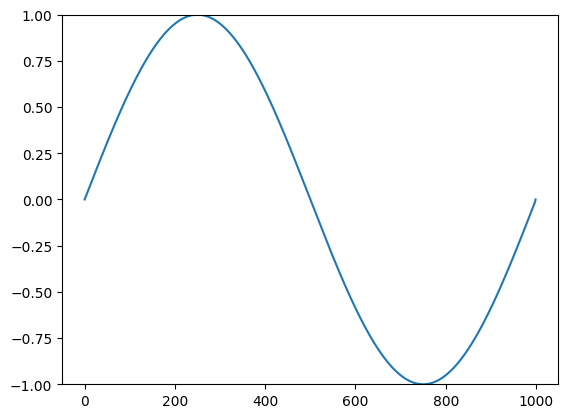

In [ ]:
from math  import  sqrt
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()

# Create x data

# Define the initial state of the line
line, = ax.plot(u[:,0])
ax.set_ylim(-1,1)

# Define the update function for the animation
def update(frame):
    # Shift the x data by one step
    line.set_ydata(u[:,frame])
    return line,

# Create the animation object
ani = FuncAnimation(fig, update, frames=range(0,2000,20), interval=10)

# Set up the HTML video player
video = HTML(ani.to_jshtml())

# Display the video player
display(video)
